# Snapping

In [1]:
import geopandas as gpd
import geoplanar
from shapely.geometry import Polygon

Snaps polygon edges to each another if the distance between polygon edges is below a threshold value

In [2]:
p1 = Polygon([[0, 0], [10,0], [10,10], [0,10]])
p2 = Polygon([(10.4, 0), (21,0), (21,20), (10.4,20)])
gdf = gpd.GeoDataFrame(geometry=[p1, p2], crs=27700)

In [3]:
gdf.to_file('rect.gpkg')

<Axes: >

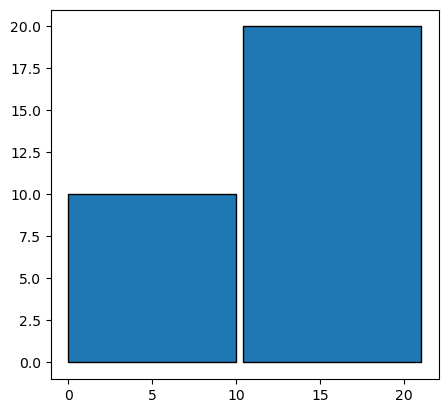

In [4]:
gdf.plot(edgecolor='k')

In [5]:
# default threshold is 0.5, so these two polygons will be snapped together
gdf1 = geoplanar.snap(gdf, 0.5)

<Axes: >

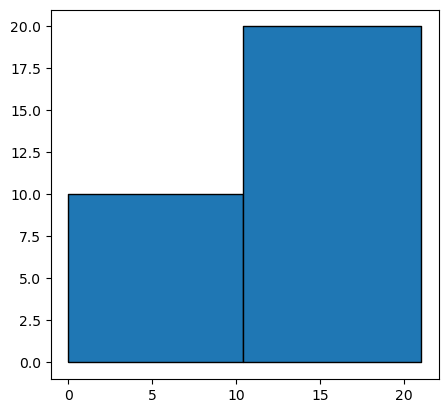

In [6]:
gdf1.plot(edgecolor='k')

In [7]:
# at a threshold of 0.4 or less, polygons are not snapped together because the distance between segmentized vertices on the
# two polygons is larger than 0.4.
# threshold should be ~10% larger than the distance between the two polygon edges to ensure snapping
gdf2 = geoplanar.snap(gdf, threshold=0.4)

<Axes: >

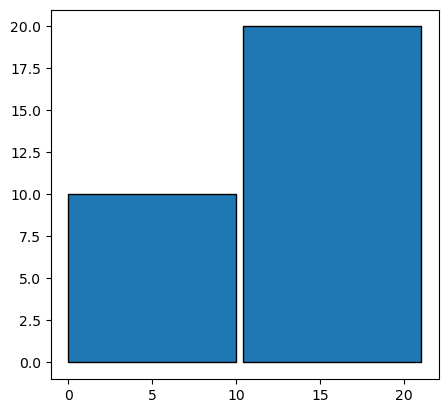

In [8]:
gdf2.plot(edgecolor='k')

# Irregular shape

In [9]:
p3 = Polygon( [[0, 0], [10,0], [13,13], [3,10] ] )
p4 = Polygon( [(10.7, 2), (23,10), (15,20)] )
gdf4=gpd.GeoDataFrame(geometry=[p3,p4])

<Axes: >

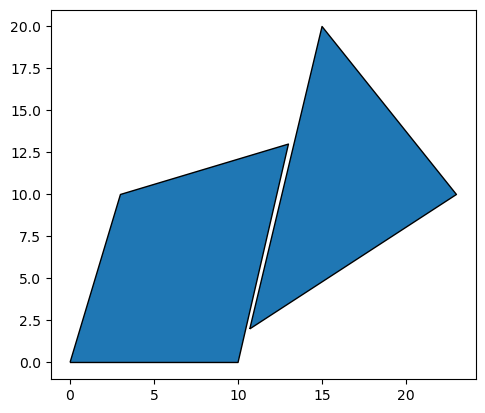

In [10]:
gdf4.plot(edgecolor='k')

In [11]:
# default threshold is 0.5
gdf5 = geoplanar.snap(gdf4, 0.5)

<Axes: >

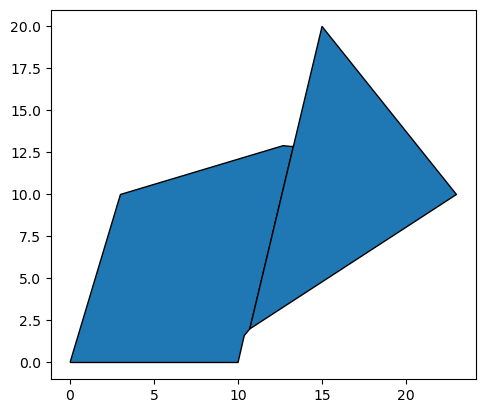

In [12]:
gdf5.plot(edgecolor='k')

In [13]:
gdf5.area

0    113.59757
1     93.50000
dtype: float64

In [14]:
# only the sections of edges that are within the threshold distance of each other will be snapped together
gdf6 = geoplanar.snap(gdf4, threshold=0.3)

<Axes: >

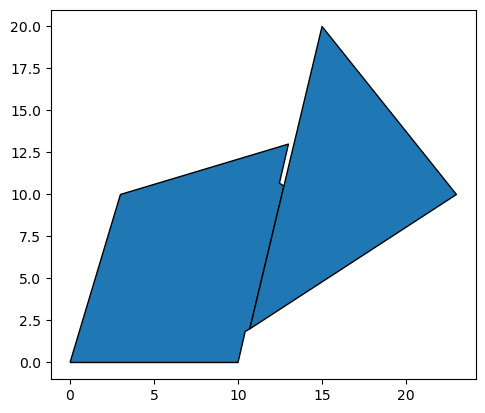

In [15]:
gdf6.plot(edgecolor='k')

# Multiple shapes

In [16]:
p5 = Polygon( [[0, 0], [10,0], [13,13], [3,10] ] )
p6 = Polygon( [(10.7, 2), (23,10), (15,20)] )
p7 = Polygon( [(10.7, 1.5), (23,9), (10.3,0)] )
gdf7=gpd.GeoDataFrame(geometry=[p5,p6,p7])

<Axes: >

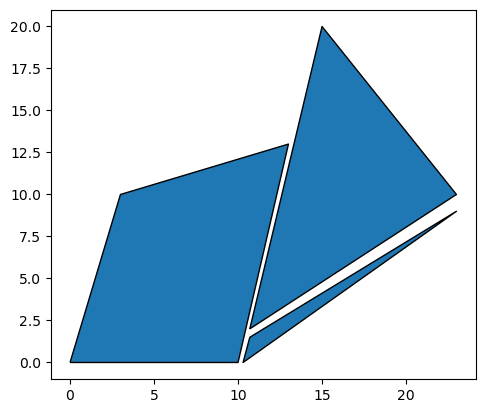

In [17]:
gdf7.plot(edgecolor='k')

In [18]:
gdf8 = geoplanar.snap(gdf7,threshold = 1)

<Axes: >

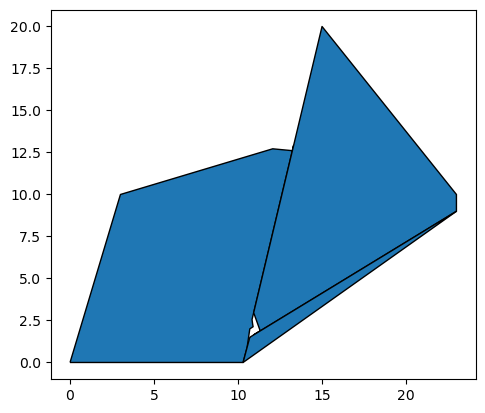

In [19]:
gdf8.plot(edgecolor='k')

Snapping may result in holes if multiple polygons are snapped to one another. This is because polygons are only snapped to one other polygon at a time, and are not optimally fitted to multiple polygons simultaneously. Further treatment can resolve this issue, such as fill_gaps().

<Axes: >

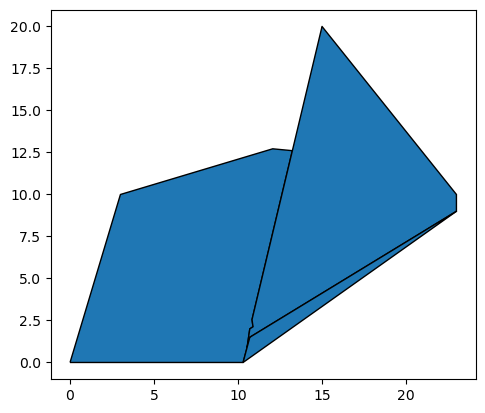

In [20]:
geoplanar.fill_gaps(gdf8, strategy='smallest').plot(edgecolor='k')

In [21]:
gap_df = geoplanar.gaps(gdf8)

<Axes: >

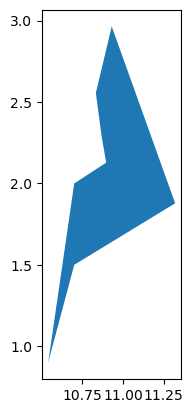

In [22]:
gap_df.plot()

In [23]:
gdf8.representative_point().sindex.query(gap_df, predicate="contains")

array([], shape=(2, 0), dtype=int64)